In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Get the data

data= pd.read_csv('sap_stock.csv')

In [3]:
# view of first 5 rows of the dataset

data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [4]:
# Check the data types in columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [5]:
# Get descriptive statistics summary of dataset

data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [6]:
# Display features in dataset

data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [7]:
# We use the daily closing price 'Close' as the value to predict, so we can discard the other features.
#Create a new dataframe with only closing price and date.

df= pd.DataFrame(data, columns=['Date', 'Close'])

In [8]:
# Checking the first 5 rows of new dataframe

df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [9]:
# Check data types in columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2550 non-null   object 
 1   Close   2550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


In [10]:
# Converting the 'Date' column into datetime format

df['Date']= pd.to_datetime(df['Date'])

In [11]:
# Get the information of the new dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2550 non-null   datetime64[ns]
 1   Close   2550 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.0 KB


In [12]:
# Check for missing values in columns

df.isnull().sum()

Date     0
Close    0
dtype: int64

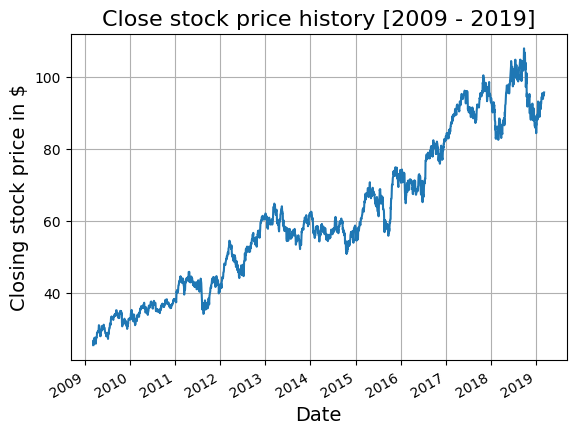

In [13]:
# when we take a look at the price movement over time by simply plotting the 'Closing price vs Time', we can already see that the price continuously- 
# -increases over time and we can also estimate that trend could be linear.
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years= mdates.YearLocator()  # Get every year
yearsfmt= mdates.DateFormatter('%Y')  # Set year format

# Create subplots to plot and control axes
fig, ax= plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the tickis
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsfmt)

# Set figure title
plt.title('Close stock price history [2009 - 2019]', fontsize= 16)

# Set x label
plt.xlabel('Date', fontsize= 14)

# Set y label
plt.ylabel('Closing stock price in $', fontsize= 14)

# Rotate and align the x labels
fig.autofmt_xdate()
ax.grid(True)

# Show plot
plt.show()

In [14]:
# Import package for splitting dataset
from sklearn.model_selection import train_test_split

In [15]:
# Split data into train and test set
train, test= train_test_split(df, test_size=0.2)

In [16]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [17]:
# Reshape index column to 2D array for .fit() method
x_train= np.array(train.index).reshape(-1, 1)
y_train= train['Close']

In [18]:
x_train

array([[ 156],
       [ 873],
       [1551],
       ...,
       [1113],
       [1737],
       [ 469]], dtype=int64)

In [19]:
# Create linear regression object
model= LinearRegression()

# Fit linear model using the train dataset
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# The Coefficient
print('Slope:', model.coef_.item())

# The Intercept
print('Intercept:', model.intercept_)

Slope: 0.027664751724556385
Intercept: 25.704400430891987


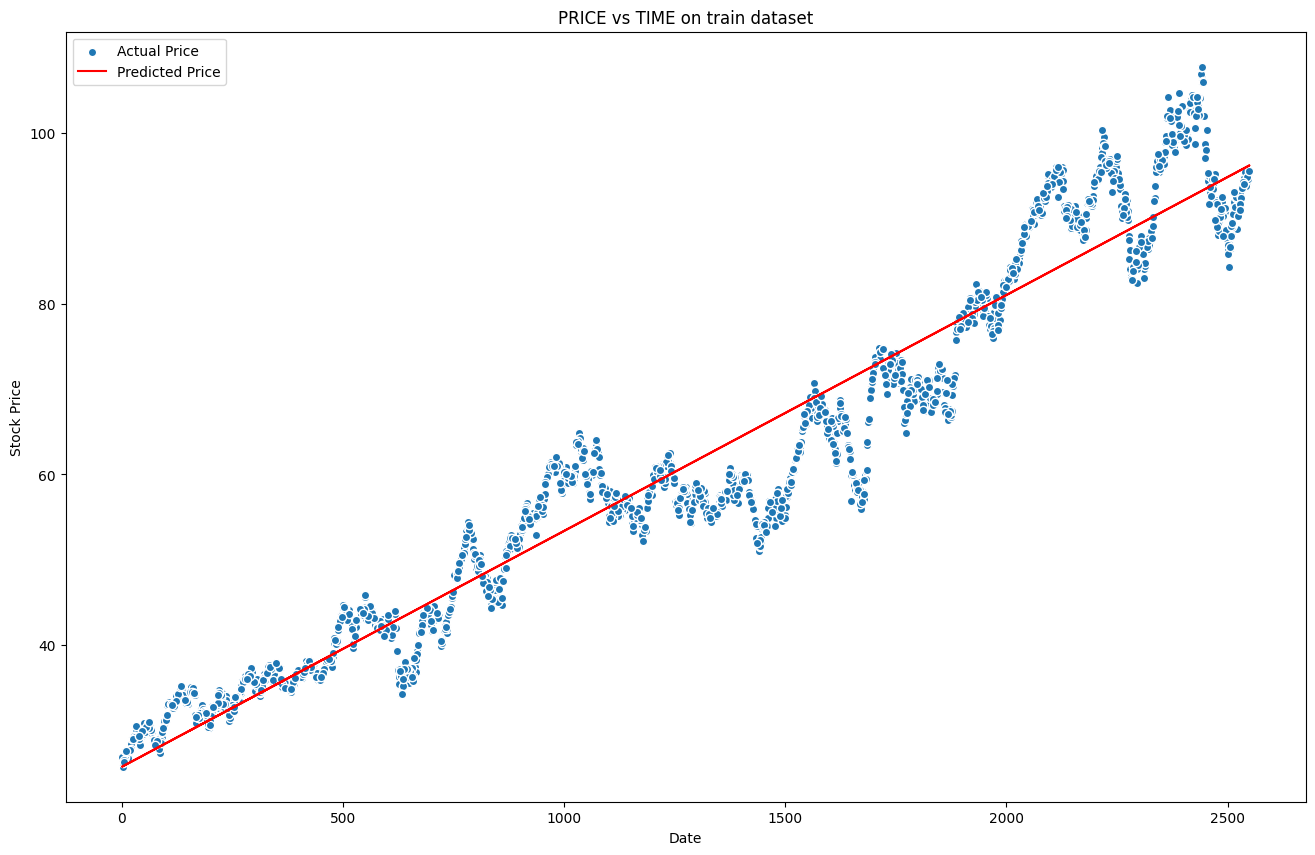

In [21]:
# Train set graph

plt.figure(figsize=(16, 10))
plt.scatter(x_train, y_train, edgecolors='w', label='Actual Price')
plt.plot(x_train, model.predict(x_train), color='r', label='Predicted Price')
plt.title('PRICE vs TIME on train dataset')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [22]:
# Create test arrays

x_test= np.array(test.index).reshape(-1, 1)
y_test= test['Close']

In [24]:
x_test

array([[1899],
       [1128],
       [1138],
       [1945],
       [ 115],
       [ 473],
       [ 622],
       [1480],
       [2110],
       [ 756],
       [ 479],
       [ 327],
       [ 610],
       [ 572],
       [1549],
       [ 161],
       [2329],
       [1035],
       [1497],
       [1006],
       [  35],
       [ 655],
       [  38],
       [1365],
       [2003],
       [2157],
       [ 606],
       [1094],
       [1174],
       [ 719],
       [1494],
       [  55],
       [1377],
       [ 467],
       [1171],
       [ 934],
       [ 326],
       [1222],
       [ 830],
       [  42],
       [1928],
       [1833],
       [2367],
       [1046],
       [1911],
       [1829],
       [1338],
       [ 995],
       [2418],
       [2053],
       [ 354],
       [1200],
       [1357],
       [ 782],
       [1552],
       [1313],
       [1995],
       [2365],
       [ 599],
       [2470],
       [1887],
       [1240],
       [1349],
       [2118],
       [1281],
       [ 227],
       [12

In [25]:
# Generate array with predicted values
y_pred= model.predict(x_test)

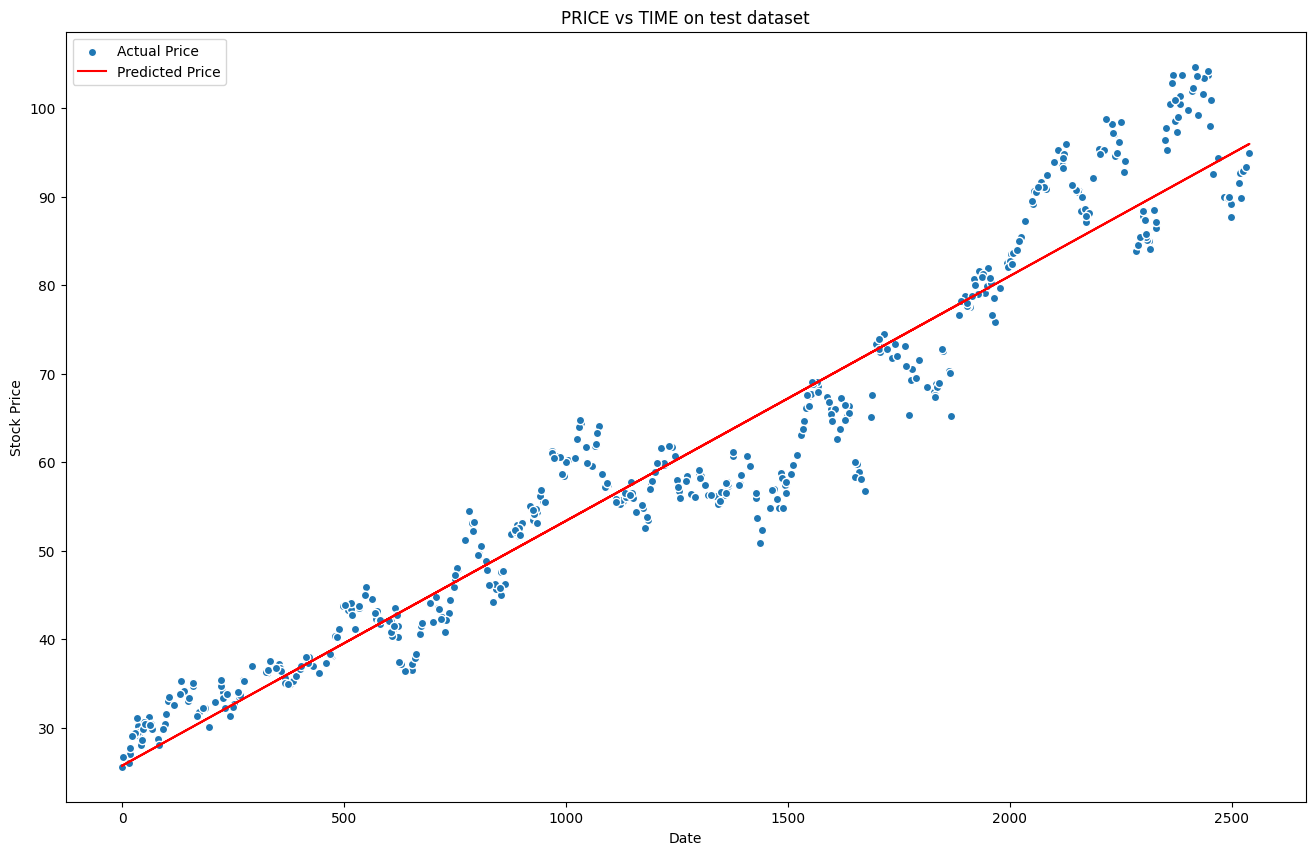

In [26]:
# test set graph
plt.figure(figsize=(16, 10))
plt.scatter(x_test, y_test, edgecolors='w', label='Actual Price')
plt.plot(x_test, model.predict(x_test), color='r', label='Predicted Price')
plt.title('PRICE vs TIME on test dataset')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [27]:
# Import metrics package from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [28]:
# Evaluating the model prediction by using regression metrics

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.12339917109596
Mean Squared Error: 27.94015035887096
Root Mean Squared Error: 5.285844337366639


In [29]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.9376213594567486


In [30]:
# Creating function for user input to check the model prediction

def predict_stock_price():
    try:
        # Get user input for the index (e.g., day number)
        user_index = int(input("Enter the index for prediction: "))
        # Ensure the input index is within the valid range
        if user_index < 0 or user_index >= len(train):
            print(f"Please enter an index between 0 and {len(train) - 1}.")
            return

        # Predict the close price for the given index
        predicted_price = model.predict(np.array([[user_index]]))

        # Output the predicted close price
        print(f"The predicted close price for day {user_index} is: ${predicted_price[0]:.2f}")
    
    except ValueError:
        print("Invalid input! Please enter a valid integer for the day index.")

# Call the function to make a prediction based on user input
predict_stock_price()

Enter the index for prediction:  23


The predicted close price for day 23 is: $26.34
